### The meaning of each column is as follows (每個欄位的意思如下)：

- CRIM: per capita crime rate by town (人均犯罪率)
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (規劃住宅用地超過 25000 平方英尺的比例)
- INDUS: proportion of non-retail business acres per town (非零售業的比例)
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (查爾斯河虛擬變數) (=1 代表大片土地，否則為 0)
- NOX: nitric oxides concentration (parts per 10 million) (氮的氧化物濃度(1000萬分之一))
- RM: average number of rooms per dwelling (平均每人所住房間數)
- AGE: proportion of owner-occupied units built prior to 1940  (1940 年前自用住宅比例)
- DIS: weighted distances to five Boston employment centres (到達 5 個波士頓就業中心的加權距離)
- RAD: index of accessibility to radial highways (到達 radial highways 的系數)
- PTRATIO: pupil-teacher ratio by town (城填師資比例)
- TAX: full-value property-tax rate per $10,000 (每 10,000 元的產權稅率)

- B:1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (城填中黑人的比例)
- LSTAT    % lower status of the population (低端人口的比例)
- MEDV     Median value of owner-occupied homes in $1000's (自用住宅價格的中位數 (1000美元))


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Boston_HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
print(f"Data_frame shape : {df.shape}")
df.info()

Data_frame shape : (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: xlabel='RM', ylabel='MEDV'>

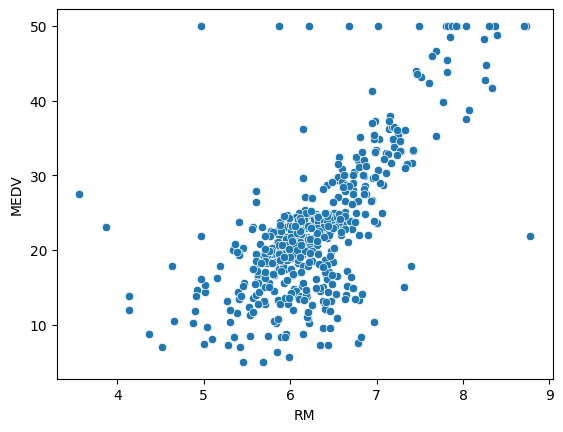

In [4]:
sns.scatterplot(x=df.RM,y=df.MEDV)

<Axes: xlabel='RM', ylabel='MEDV'>

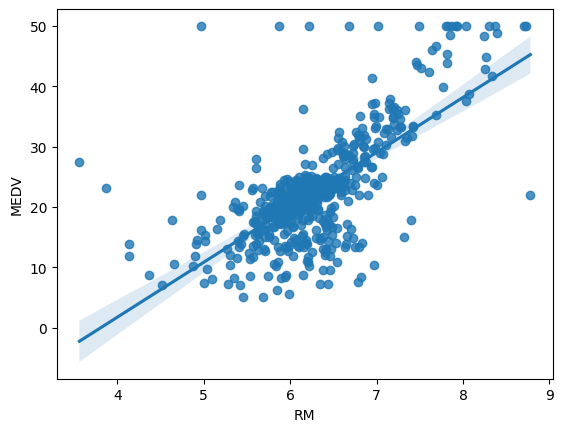

In [5]:
sns.regplot(x= df.RM, y=df.MEDV)

## Linear Regression
截取 MEDV 當成 Y, 截取 RM 當成 X。我們要做單變量迴歸，用 RM 來預測 MEDV (房價)

Our regression model is $MEDV = \beta_0 + \beta_1 \times RM$.
We simply rewrite is as $y = \beta_0 + \beta_1 \times x$ where $MEDV \leftrightarrow y$ and $RM \leftrightarrow x$.

In [6]:
X = df.loc[:,['RM']]
Y = df.loc[:,['MEDV']]
print(X.head())
print(Y.head())

      RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


##### Split training set and the test set (切割出訓練集，以及測試集)

We use sklearn to split the training set and the test set.

`test_size` represents the proportion of the dataset to include in the test split.

`test_size` 屬性代表要放入 test 資料集的比例。如果指定為 1/3，那代表全部資料的 1/3 要被放入測試集。

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
print("X_train:", X_train)
print("Y_train:", y_train)
print("X_test:", X_test)
print("Y_test:", y_test)

X_train:         RM
394  5.887
194  6.604
477  5.304
461  6.376
160  6.250
..     ...
323  5.708
192  7.178
117  6.021
47   6.030
172  5.572

[337 rows x 1 columns]
Y_train:      MEDV
394  12.7
194  29.1
477  12.0
461  17.7
160  27.0
..    ...
323  18.5
192  36.4
117  19.2
47   16.6
172  23.1

[337 rows x 1 columns]
X_test:         RM
329  6.333
371  6.216
219  6.373
403  5.349
78   6.232
..     ...
64   7.104
327  6.083
322  6.041
81   6.619
360  6.398

[169 rows x 1 columns]
Y_test:      MEDV
329  22.6
371  50.0
219  23.0
403   8.3
78   21.2
..    ...
64   33.0
327  22.2
322  20.4
81   23.9
360  25.0

[169 rows x 1 columns]


<Axes: xlabel='RM', ylabel='MEDV'>

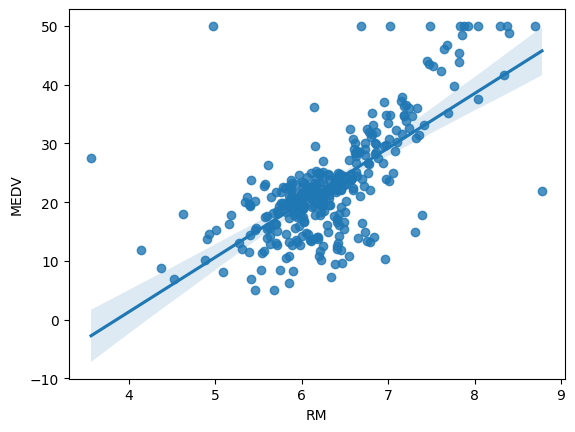

In [9]:
sns.regplot(x= X_train["RM"], y=y_train["MEDV"])

In [11]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

##### Our regression model is $MEDV = \beta_0 + \beta_1 \times RM$.

In [12]:
print(regressor.intercept_)
print(regressor.coef_[0])

[-35.83043813]
[9.29194184]


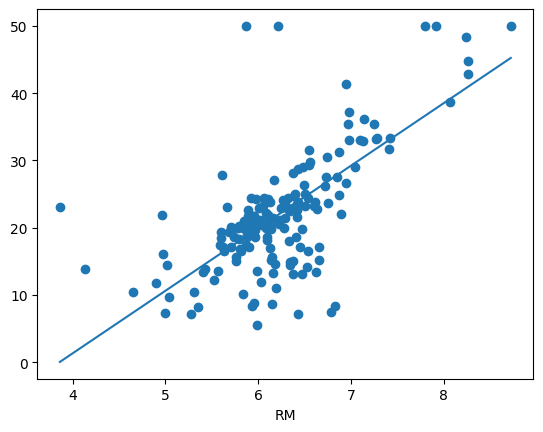

In [13]:
y_pred = regressor.predict(X_test)
plt = sns.lineplot(x = X_test["RM"], y = y_pred.ravel())
plt.scatter(x = X_test["RM"], y = y_test)

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MSE is %.2f, MAE is %.2f and RMSE is %.2f " % (mse, mae, np.sqrt(mse)))


MSE is 44.11, MAE is 4.32 and RMSE is 6.64 


##### Determine $R^2$

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.446846413877101

##### Predict

In [17]:
regressor.predict([[5],[6],[7]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.62927105],
       [19.92121289],
       [29.21315473]])